# **LetsGrowMore(LGM)**
# Task 1 - ***Exploratory Data Analysis on Dataset - Terrorism ***
# Submitted by - **Devansh Dutt**

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Mounting Google drive

In [2]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [3]:
link = 'https://drive.google.com/file/d/1mnJ_zLtfBqmuYKTPfDxBGa79OhupXzLG/view?usp=sharing'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('globalterrorismdb_0718dist.csv')

df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,damage
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN,0.0
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,...,NaN,Automatic fir

In [40]:
df.shape

(181691, 136)

In [41]:
print([col for col in df.columns])

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [42]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [43]:
df.isnull().sum() #checking null values for each column

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
damage         16874
Length: 136, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [10]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

Printing some insights from the data

In [29]:
print('Country with the highest number of Terrorist Attacks:',df['country_txt'].value_counts().index[0])
print('Regions with the highest number of  Terrorist Attacks:',df['region_txt'].value_counts().index[0])
print('Maximum number of people were killed by a single terrorist attack are',df['nkill'].max(),'people that took place in',df.loc[df['nkill'].idxmax()].country)

Country with the highest number of Terrorist Attacks: Iraq
Regions with the highest number of  Terrorist Attacks: Middle East & North Africa
Maximum number of people were killed by a single terrorist attack are 1570.0 people that took place in 95


Add column Damage (Number of Dead/Injured people) by adding Nkill and Nwound

In [30]:
df['damage']=df['nkill']+df['nwound']
damage = df[["iyear","damage"]].groupby('iyear').sum()
new_year =  df["iyear"].unique().tolist()

#Top 10 most attacked countries

In [14]:
x=df["country_txt"].value_counts().index[:10]
y=df["country_txt"].value_counts().values[:10]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

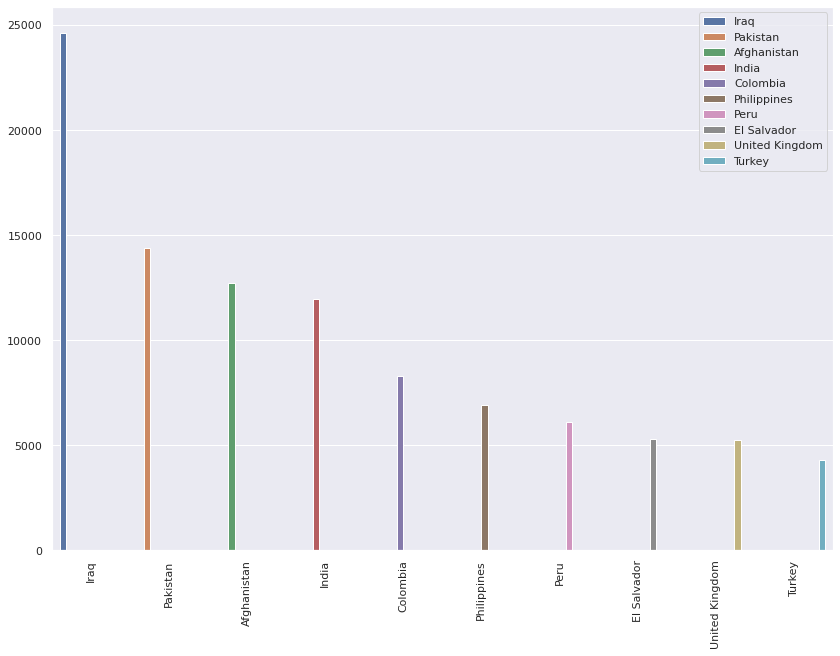

In [15]:
sns.set(rc={'figure.figsize':(14,10)})
sns.barplot(x,y,hue=x)
plt.xticks(rotation= 90)

# Most used weapon type in the attacks

([<matplotlib.patches.Wedge at 0x7f0d8df7dc90>,
 [Text(-0.03776951053402583, 1.09935138335021, 'Explosives'),
  Text(-0.5135486495768512, -0.9727629641992919, 'Firearms'),
  Text(0.7843712151522384, -0.7712080113954995, 'Unknown'),
  Text(1.0440447562809705, -0.34636764699118344, 'Incendiary'),
  Text(1.0977847051665484, -0.069776364926777, 'Melee')],
 [Text(-0.02060155120037772, 0.5996462091001145, '51%'),
  Text(-0.280117445223737, -0.530597980472341, '32%'),
  Text(0.42783884462849364, -0.42065891530663607, '8%'),
  Text(0.5694789579714383, -0.1889278074497364, '6%'),
  Text(0.5987916573635718, -0.038059835414605635, '2%')])

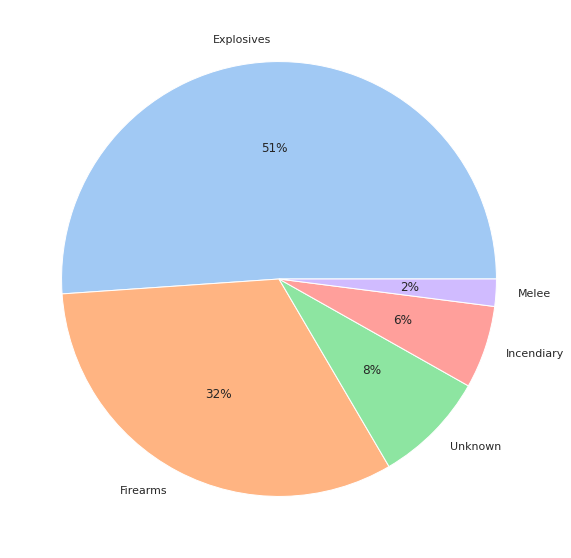

In [16]:
n=df["weaptype1_txt"].value_counts().values[:5]
m=df["weaptype1_txt"].value_counts().index[:5]
colors=sns.color_palette('pastel')[0:5]
plt.pie(n,labels=m,colors=colors,autopct='%.0f%%')
#sns.set(rc={'figure.figsize':(16,10)})
#sns.barplot(m,n,hue=m,dodge=False)
#plt.xticks(rotation= 90)

# Attack type 

([<matplotlib.patches.Wedge at 0x7f0d8df60b50>,
 [Text(0.033882077055399064, 1.0994780601969336, 'Bombing/Explosion'),
  Text(-0.8532987164271567, -0.694176707001731, 'Armed Assault'),
  Text(0.21169836827034832, -1.079436797997767, 'Assassination'),
  Text(0.7297305729546222, -0.823099806156774, 'Hostage Taking (Kidnapping)'),
  Text(0.9807003832706055, -0.4982236026653972, 'Facility/Infrastructure Attack'),
  Text(1.0855292611170566, -0.17783763172809405, 'Unknown'),
  Text(1.0998274814741251, -0.019481041919850395, 'Unarmed Assault')],
 [Text(0.01848113293930858, 0.5997153055619637, '49%'),
  Text(-0.4654356635057218, -0.3786418401827623, '24%'),
  Text(0.1154718372383718, -0.588783707998782, '11%'),
  Text(0.3980348579752484, -0.4489635306309676, '6%'),
  Text(0.5349274817839665, -0.2717583287265803, '6%'),
  Text(0.5921068697002126, -0.09700234457896038, '4%'),
  Text(0.5999058989858864, -0.01062602286537294, '1%')])

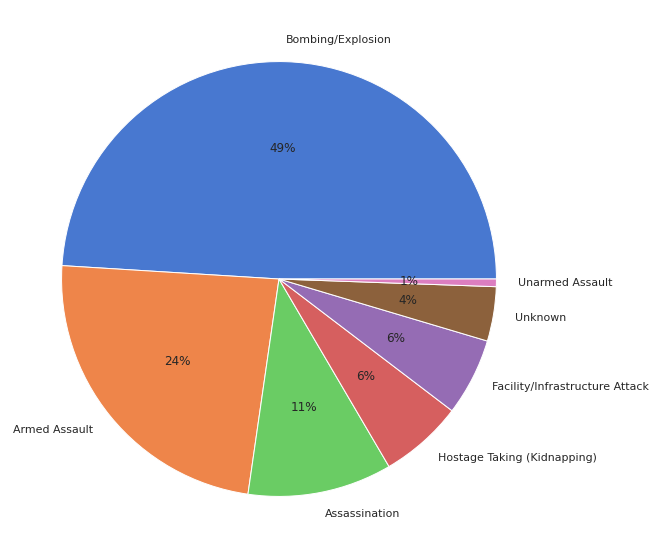

In [17]:
n=df["attacktype1_txt"].value_counts().values[:7]
m=df["attacktype1_txt"].value_counts().index[:7]
colors=sns.color_palette('muted')[0:7]
plt.pie(n,labels=m,colors=colors,autopct='%.0f%%')

# Targets aimed for attacks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

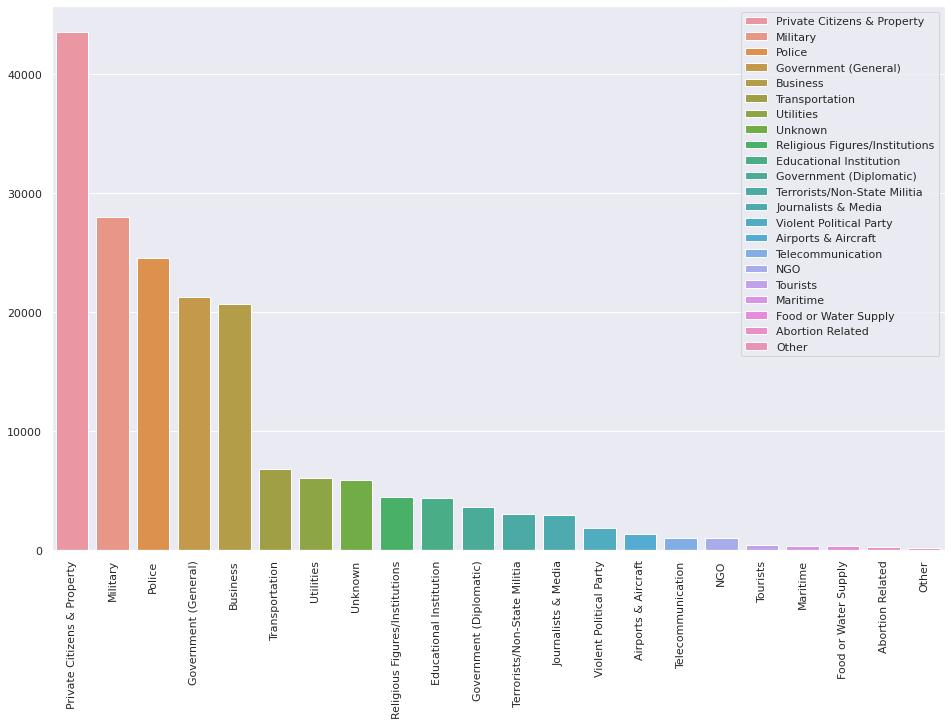

In [18]:
n=df["targtype1_txt"].value_counts().values
m=df["targtype1_txt"].value_counts().index
sns.set(rc={'figure.figsize':(16,10)})
sns.barplot(m,n,hue=m,dodge=False)
plt.xticks(rotation= 90)

# How many people were killed and wounded in the respective year

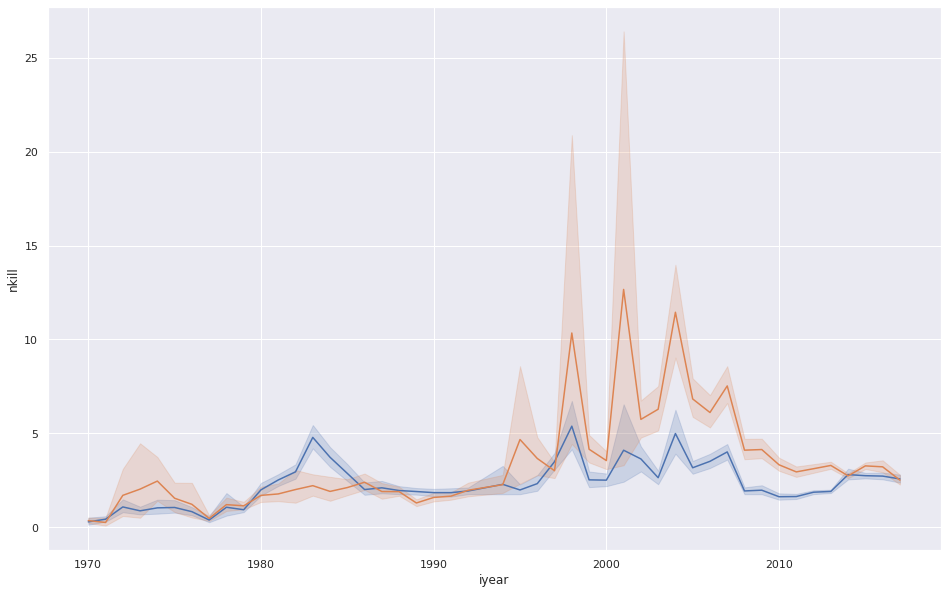

In [19]:
#sns.lmplot(x='iyear',y='nkill',data=df,fit_reg=False,hue='extended',legend=True,palette="Set1")
sns.lineplot(x='iyear',y='nkill',data=df,)
sns.lineplot(x='iyear',y='nwound',data=df)




#Number of attack each year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


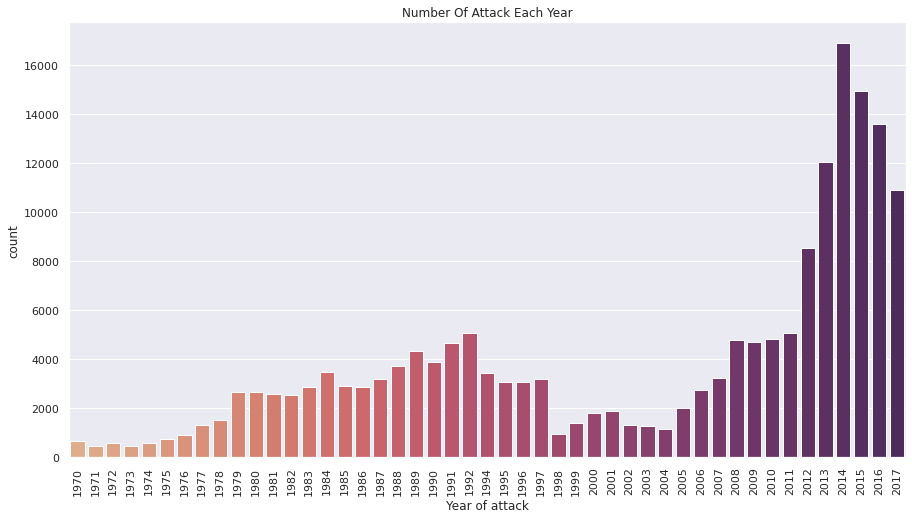

In [20]:

plt.subplots(figsize=(15,8))
sns.countplot('iyear',data=df,palette='flare')
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Attack Each Year')
plt.show()

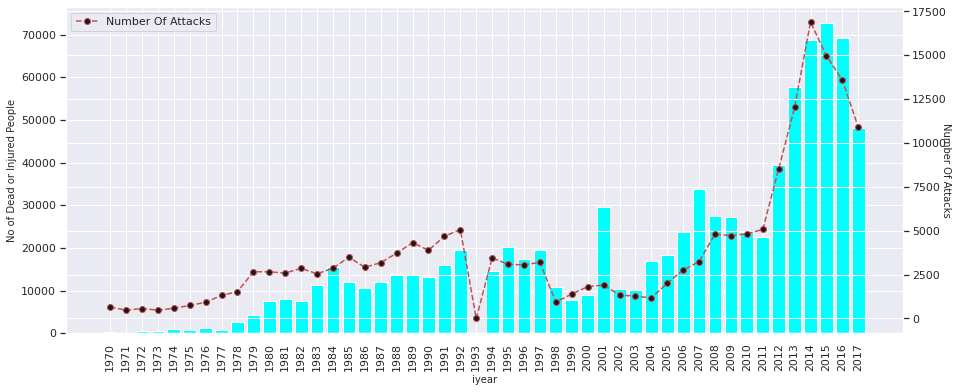

In [36]:
#bar chart
fig, ax1 = plt.subplots(figsize = (15,6))
ax1.bar(people_damage.index, [i[0] for i in people_damage.values], color= 'cyan' )
ax1.set_xticklabels(np.arange(1970, 2018, step=1), rotation=90)
ax1.set_ylabel('No of Dead or Injured People', size = 10)
ax1.set_xlabel('iyear', size = 10)
ax2 = ax1.twinx()

#Filter & get a number of attacked in the world from 1970 to 2017 
attack = []
for year in new_year:
    attack.append(len(df[df['iyear'] == year][["iyear"]]))
attack.insert(23, 0)

#draw plot chart
ax2.set_ylabel('Number Of Attacks', size = 10,rotation=-90)
ax2.plot(range(1970, 2018), attack, 'r--o', mfc='k', label='Number Of Attacks')

plt.xticks(np.arange(1970, 2018, step=1))
plt.legend(loc='upper left')
plt.show()

#Plot year and region damage

Text(0, 0.5, 'Damage')

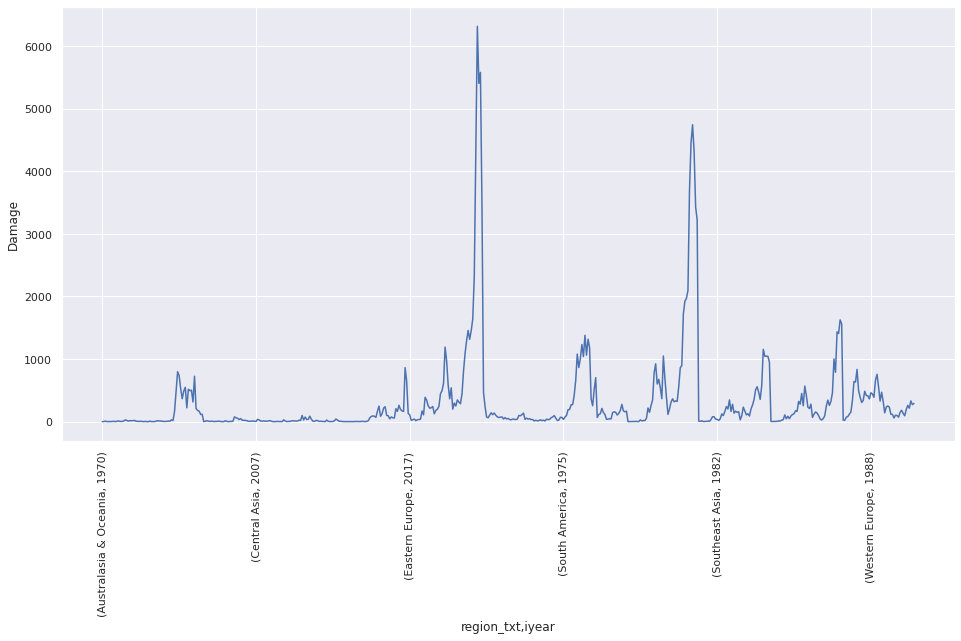

In [37]:

plt.subplots(figsize=(16,8))
df.groupby(['region_txt', 'iyear']).count()['damage'].plot()
plt.xticks(rotation=90)
plt.ylabel("Damage")

# **Conclusion**


*   Iran has the most terrorism activities in the global terrorism.
*   Most targeted areas are private citizens and property, military, police, and so on
*   Regions with the highest number of  Terrorist Attacks: Middle East & North Africa.
*   Iraq suffered from most terrorist attacks in 2014, with the most deaths in that year.

